In [4]:
import os
import pandas as pd
import numpy as np
train_data = pd.read_csv("input/train.csv")
train_data.head()
# feature cleaning
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].mean())
test_data = pd.read_csv("input/test.csv")
test_data.head()
test_data["Age"] = test_data["Age"].fillna(train_data["Age"].mean())
test_data["Fare"] = test_data["Fare"].fillna(train_data["Fare"].mean())
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

print(X_test.isnull().values.any())
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
#model = LogisticRegression(solver="liblinear")
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('output/my_submission_rf.csv', index=False)
print("Your submission was successfully saved!")

% of women who survived: 0.7420382165605095
False
Your submission was successfully saved!


In [ ]:
# **********************

DATA DESCRIBE : **************************************************************************
        PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33 

DATA HEAD : **************************************************************************
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5   

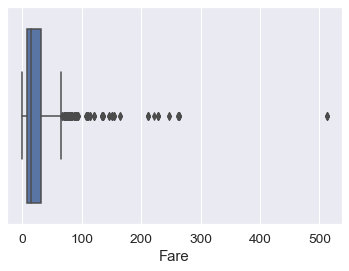

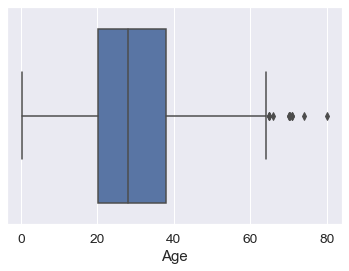

Null Statistics: **************************************************************************
COLUMN               NULL CNT             NULL RATE
PassengerId          0                    0.00%
Survived             0                    0.00%
Pclass               0                    0.00%
Name                 0                    0.00%
Sex                  0                    0.00%
Age                  177                  19.87%
SibSp                0                    0.00%
Parch                0                    0.00%
Ticket               0                    0.00%
Fare                 0                    0.00%
Cabin                687                  77.10%
Embarked             2                    0.22%
DATA HEAD : **************************************************************************
    Pclass  SibSp  Parch     Fare        Age  Sex_female  Sex_male  Embarked_C  \
0       3      1      0   7.2500  22.000000           0         1           0   
5       3      0      0   8.

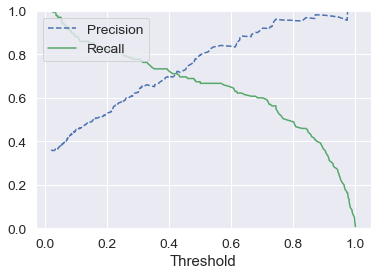

0.8373506571087217
output/my_submission_lr_2020-02-19 17:30:35.254392.csv
Your submission was successfully saved!


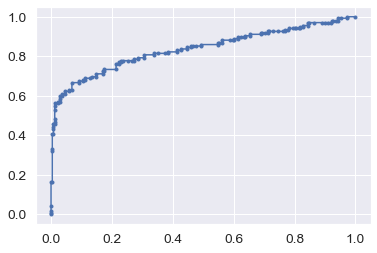

In [208]:
# *************************        Phase0: packages & methods *****************************
import datetime
import random
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def info_print(header, content):
    print(header, ': **************************************************************************\n', content, '\n')
    
def value_counts(df):
    for fea in df.columns:
        print(df[fea].value_counts())
        
def facet_grid(df, label):
    for fea in df.columns:
        if fea != label :
            grid = sns.FacetGrid(df, col=label)
            grid.map(plt.hist, fea, bins=20)
            plt.show()
            
def box_report(df):
    for fea in df.columns:
        if fea != label :
            sns.boxplot(x = fea, data=df)
            plt.show()
    
def corr_heatmap(df, label, k):
    corr = train_data.corr()
    sns.heatmap(corr, vmax=.8, square=True)
    plt.show()
    print(round(corr, 2))
    cols = corr.nlargest(k, label)[label].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    
def null_report(df):
    print('Null Statistics: **************************************************************************')
    print('COLUMN'.ljust(20), 'NULL CNT'.ljust(20), 'NULL RATE')
    for i in df.columns:
        d=len(df) - df[i].count()
        r=(d / len(df)) * 100
        rate='%.2f%%' % r
        print(str(i).ljust(20), str(d).ljust(20), rate)
        
def null_process(train_data, test_data, cols):
    for col in cols:
        train_data[col] = train_data[col].fillna(train_data[col].mean())
        test_data[col] = test_data[col].fillna(train_data[col].mean())
        
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()
        
### Phase 1: data visualization and analysis
train_data = pd.read_csv("input/train.csv")
info_print('DATA DESCRIBE', round(train_data.describe(), 2))
info_print('DATA HEAD', train_data.head(5))
label = 'Survived'
# possible feature extraction
all_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age']
discrete_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
continuous_feas = ['Fare', 'Age']

# value_counts(train_data)
box_report(train_data[continuous_feas])#todo: how to deal with outliers?
null_report(train_data)

#todo: how to analyse without modifying data
# facet_grid(train_data, label)
# corr_heatmap(train_data, label, 20)

# *************************        Phase2: feature engineering *****************************
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age']

ratio = 0.6
train_data['rand'] = train_data[label].apply(lambda x: random.random())

# T - training set, V - validation set
train_data_T = train_data[train_data.rand <= ratio]
train_data_V = train_data[train_data.rand > ratio]

y_train_T = train_data_T[label]
y_train_V = train_data_V[label]

X_train_T = pd.get_dummies(train_data_T[features])
X_train_V = pd.get_dummies(train_data_V[features])


test_data = pd.read_csv("input/test.csv")
X_test = pd.get_dummies(test_data[features])

null_process(X_train_T, X_train_V, continuous_feas)
null_process(X_train_T, X_test, continuous_feas)

info_print('DATA HEAD', X_train_V.head(5))
info_print('DATA HEAD', X_test.head(5))


# *************************        Phase3: model training & evaluating *****************************
print(X_test.isnull().values.any())
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
#model = LogisticRegression(solver="liblinear")

model.fit(X_train_T, y_train_T)

y_train_V_pred = model.predict(X_train_V)
y_train_V_prob = model.predict_proba(X_train_V)[::,1]

y_test = model.predict(X_test)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score
print(confusion_matrix(y_train_V_pred, y_train_V))
print(precision_score(y_train_V_pred, y_train_V))
print(recall_score(y_train_V_pred, y_train_V))

precisions, recalls, thresholds = precision_recall_curve(y_train_V, y_train_V_prob)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


fpr, tpr, _ = roc_curve(y_train_V, y_train_V_prob)
plt.plot(fpr, tpr, marker='.', label='Logistic')
auc = roc_auc_score(y_train_V, y_train_V_prob)
print(auc)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_test})
output_filename = 'output/my_submission_lr_' + str(datetime.datetime.now()) + '.csv'
print(output_filename)
output.to_csv(output_filename, index=False)
print("Your submission was successfully saved!")